In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!mkdir images


In [4]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_image = []
DATADIR = '/content/drive/MyDrive/MiniProjectML/Images'
Categ = ['Airplane','Bike','Car','Person']
for i in Categ:
  class_num = Categ.index(i)
  path = os.path.join(DATADIR,i)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    img_resized = resize(img_array,(200,200,3))
    flat_image.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_image = np.array(flat_image)
target = np.array(target)
images = np.array(images)



In [5]:
np.unique(target, return_counts = True)

(array([0, 1, 2, 3]), array([75, 75, 75, 75]))

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_image,target,random_state=32)


In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

model = SVC()
param = {
    'kernel':['rbf'],
    'C':[10]
}

grid = GridSearchCV(model,param,cv=5)
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [10], 'kernel': ['rbf']}, pre_dispatch='2*n_jobs',
             refit=True, return_train_score=False, scoring=None, verbose=0)

In [8]:
y_pred = grid.predict(x_test)

In [9]:
y_pred


array([3, 3, 3, 2, 0, 0, 2, 3, 1, 1, 2, 3, 2, 0, 2, 1, 2, 3, 1, 0, 0, 0,
       3, 0, 2, 2, 3, 2, 2, 3, 0, 1, 0, 3, 3, 1, 2, 1, 3, 0, 0, 0, 3, 2,
       2, 2, 0, 0, 1, 3, 1, 2, 3, 2, 1, 3, 3, 0, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 3, 1, 2, 3, 2, 1, 0, 0])

In [10]:
y_test

array([3, 3, 3, 0, 2, 3, 2, 3, 1, 1, 2, 3, 2, 0, 2, 1, 2, 3, 1, 0, 0, 0,
       3, 0, 2, 0, 3, 2, 2, 3, 0, 1, 0, 3, 0, 1, 2, 1, 3, 0, 0, 0, 3, 2,
       2, 2, 0, 0, 1, 2, 1, 2, 3, 2, 1, 3, 3, 0, 0, 1, 2, 3, 2, 1, 0, 3,
       0, 3, 1, 2, 3, 2, 1, 0, 0])

In [11]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_pred,y_test)


0.92

In [12]:
confusion_matrix(y_pred,y_test)

array([[18,  0,  1,  1],
       [ 0, 14,  0,  0],
       [ 2,  0, 18,  0],
       [ 1,  0,  1, 19]])

Enter a URLhttps://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRyzJQ16dUj6dmyVkU29rrb8OBmISm5a5bLfw&usqp=CAU
(196, 257, 3)
Prediction: Person


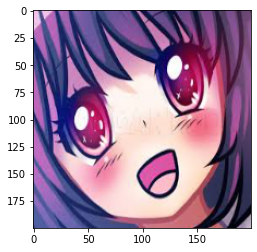

In [18]:
flattened = []
url = input('Enter a URL')
img = imread(url)
resized_img = resize(img,(200,200,3))
flattened.append(resized_img.flatten())
flattened = np.array(flattened)
print(img.shape)
plt.imshow(resized_img)
y_out = grid.predict(flattened)
y_out = Categ[y_out[0]]
print(f'Prediction: {y_out}')